The classical Lax-Friedrichs (LxF) method has the form

\begin{equation}
Q_{i}^{n+1} = \frac{1}{2}(Q_{i-1}^{n} + Q_{i+1}^{n}) - \frac{\Delta t}{2\Delta x}[f(Q_{i+1}^{n}) - f(Q_{i-1}^{n})]
\end{equation}

In [1]:
%matplotlib notebook
%pylab
from exact_r import *

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
N = 200
#M = 20

# Spatial domain
ax = -5
bx = 5
ay = -2
by = 4

to = 0
Tfinal = 3

dx = (bx - ax)/N

cfl = 0.9
a = 1.7
dt_est = cfl*dx/a

M = int(floor(Tfinal/dt_est) + 1)

dt = Tfinal/(M)

# Temporal domain
t = linspace(to,Tfinal,M)
xe = linspace(ax,bx,N+1)
x = xe[:-1] + dx/2 
# Gravity
g = 1

In [3]:
hl = 2
hr = 1
ul = 0
ur = 0

In [4]:
#intial data
ql = array([hl,hl*ul])
qr = array([hr,hr*ur])

In [5]:
def flux(q1,q2):
    f1 = lambda q1,q2: q2
    f2 = lambda q1,q2: q1*((q2/q1)**2) + (0.5*g*(q1)**2)
    return f1,f2

In [6]:
# max wave speed
def maxs(q1,q2,g):
    h = q1
    u = q2/q1
    mx1 = abs(u + sqrt(g*h))
    mx2 = abs(u - sqrt(g*h))
   
    maxo = max(mx1,mx2) #max wave speed
    
    return maxo

In [7]:
#Initial conditions
qold1 = zeros(N)
qold2 = zeros(N)
qnew1 = zeros(N)
qnew2 = zeros(N)

qold1 = where(x <= 0 , ql[0], qr[0])
qold2 = where(x <= 0 , ql[1], qr[1]) 


In [8]:
#time step
def timestep(dx,cfl,maxs,q1,q2):
    maxo = zeros(N)
    for i in range(N):
        maxo[i] = maxs(q1[i],q2[i],g)

    dt = cfl*dx/max(maxo)
    
    return dt
   

<IPython.core.display.Javascript object>


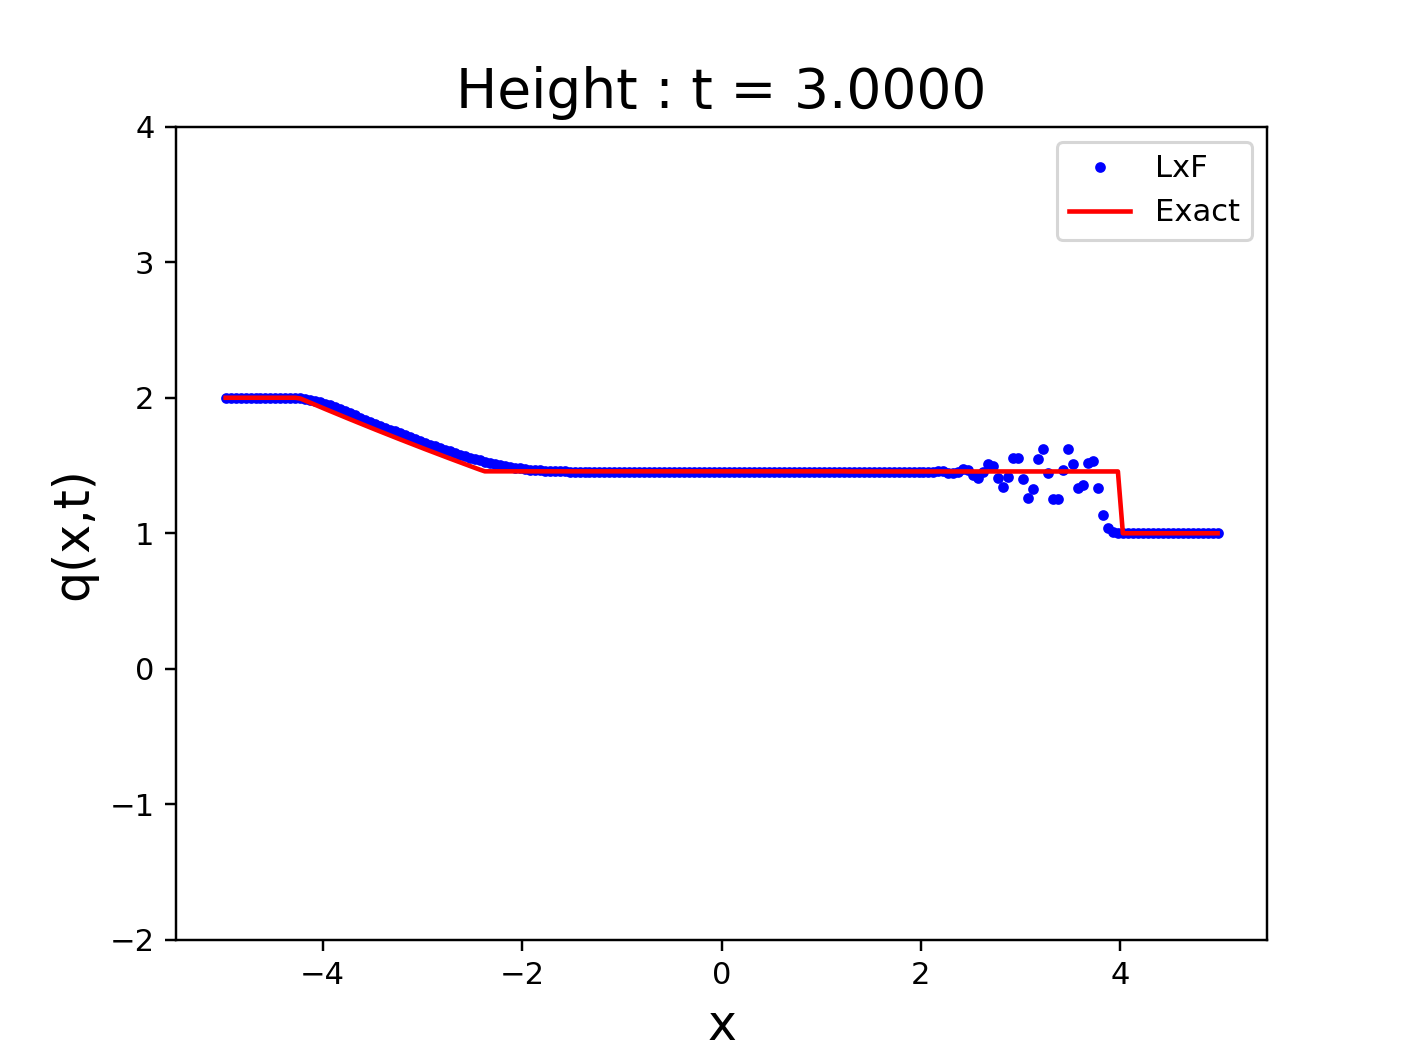

In [9]:
fig = figure(1)
clf()

mq =0

if mq == 0:
    tstr = 'Height : t = {:.4f}'
    hdl, = plot(x,qold1,'b.',markersize=5,label='LxF')
else:
    tstr = 'Momentum : t = {:.4f}'
    hdl, = plot(x,qold2,'b.',markersize=5,label='LxF')

htitle = title(tstr.format(0),fontsize=18)

q0 = qexact(x,to,mq,ql,qr,g)

hde, = plot(x,q0,'r-',markersize=5,label='Exact')

for n in range(M):

    #exact solver
    q = qexact(x,t[n],mq,ql,qr,g)
    
    hde.set_ydata(q)
    
    dt = timestep(dx,cfl,maxs,qold1,qold2) 

    for i in range(N):
        if i == 0:
            qnew1[i] = ql[0]
            qnew2[i] = ql[1]   
                
        elif 0 < i and i<N-1:
            f1,f2 = flux(qold1,qold2)
            qnew1[i] = 0.25*(qold1[i-1] + 2*qold1[i] + qold1[i+1]) - 0.5*(dt/dx)*\
                     (f1(qold1[i+1],qold2[i+1]) - f1(qold1[i-1],qold2[i-1]))
            qnew2[i] = 0.25*(qold2[i-1] + 2*qold2[i] + qold2[i+1]) - 0.5*(dt/dx)*\
                         (f2(qold1[i+1],qold2[i+1]) - f2(qold1[i-1],qold2[i-1]))
        else:
            qnew1[i] = qr[0]
            qnew2[i] = qr[1]
       
    if mq == 0:
        hdl.set_ydata(qnew1)
    else:
        hdl.set_ydata(qnew2)
    
    qold1 = qnew1.copy()
    qold2 = qnew2.copy()
    
    xlabel('x',fontsize=16)
    ylabel('q(x,t)',fontsize=16)
    htitle.set_text(tstr.format(t[n]))
    
    ylim([ay,by])
    legend()
    pause(0.1)

    fig.canvas.draw()  
    